# Metehan Ayhan - San Francisco Airport Project

Bu projenin amacı, San Francisco Havalimanı'ndaki yolcu hareketlerine ait verileri kullanarak, K-Means kümeleme analiziyle anlamlı yolcu grupları oluşturmaktır. Bu amaçla Elbow Method'u kullanarak en uygun küme sayısı belirlenip, havalimanındaki farklı yolcu davranışları ve segmentleri hakkında içgörüler elde edilmesi hedeflenmektedir.

<img src='https://s.hdnux.com/photos/73/63/41/15677533/4/rawImage.jpg' width='500'>

### Data Dictionary
- Activity Period: Aktivitenin gerçekleştiği yıl ve ay bilgisi.
- Operating Airline: Uçuşu gerçekleştiren havayolu şirketinin adı.
- Operating Airline IATA Code: Uçuşu gerçekleştiren havayolu şirketinin IATA kodu.
- Published Airline: Uçuşun biletlerinin yayınlandığı havayolu şirketi.
- Published Airline IATA Code: Yayınlanan havayolu şirketinin IATA kodu.
- GEO Summary: Uçuşun yapıldığı coğrafi bölgenin özeti.
- GEO Region: Uçuşun yapıldığı coğrafi bölge veya ülke.
- Activity Type Code: Yolcu aktivitesinin türü.
- Price Category Code: Biletin fiyat kategorisi.
- Terminal: Yolcuların hizmet aldığı terminal.
- Boarding Area: Yolcuların uçağa bindiği alan veya kapı bölgesi.
- Passenger Count: Belirtilen aktivitedeki yolcu sayısı.

### Import Packet

In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [8]:
df=pd.read_csv('air-traffic-passenger-statistics.csv')

In [9]:
df.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


### EDA - Exploratory Data Analysis

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18885 entries, 0 to 18884
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Activity Period              18885 non-null  int64 
 1   Operating Airline            18885 non-null  object
 2   Operating Airline IATA Code  18822 non-null  object
 3   Published Airline            18885 non-null  object
 4   Published Airline IATA Code  18822 non-null  object
 5   GEO Summary                  18885 non-null  object
 6   GEO Region                   18885 non-null  object
 7   Activity Type Code           18885 non-null  object
 8   Price Category Code          18885 non-null  object
 9   Terminal                     18885 non-null  object
 10  Boarding Area                18885 non-null  object
 11  Passenger Count              18885 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 1.7+ MB


In [12]:
df.isnull().sum()

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [13]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
13272,201501,United Airlines,UA,United Airlines,UA,Domestic,US,Thru / Transit,Other,Terminal 3,F,380
11949,201402,Cathay Pacific,CX,Cathay Pacific,CX,International,Asia,Enplaned,Other,International,A,15901
1075,200604,Horizon Air,QX,Alaska Airlines,AS,Domestic,US,Enplaned,Other,Terminal 1,B,4427
7438,201010,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Asia,Thru / Transit,Other,International,G,2893
10877,201304,United Airlines - Pre 07/01/2013,UA,United Airlines - Pre 07/01/2013,UA,International,Australia / Oceania,Enplaned,Other,International,G,7388


In [14]:
df['Operating Airline IATA Code'].fillna(df['Operating Airline IATA Code'].mode()[0], inplace=True); 
df['Published Airline IATA Code'].fillna(df['Published Airline IATA Code'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Activity Period                0
Operating Airline              0
Operating Airline IATA Code    0
Published Airline              0
Published Airline IATA Code    0
GEO Summary                    0
GEO Region                     0
Activity Type Code             0
Price Category Code            0
Terminal                       0
Boarding Area                  0
Passenger Count                0
dtype: int64

### Elbow Method

In [17]:
x = df.copy()
x = pd.get_dummies(x)

In [18]:
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

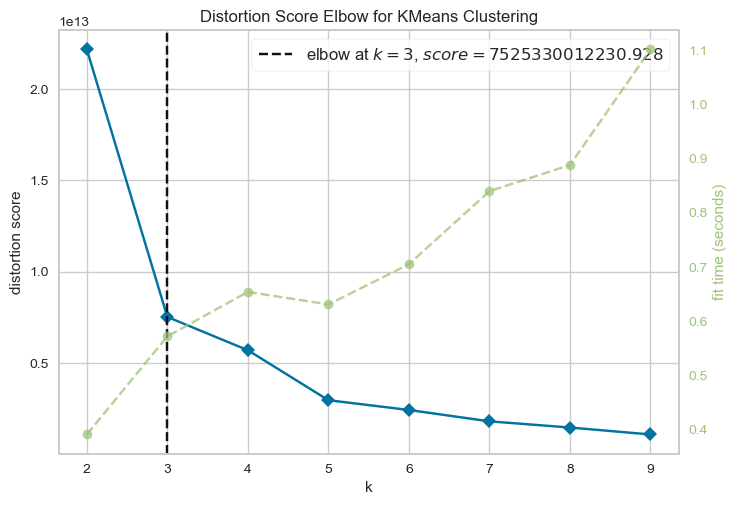

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
visualizer.fit(x) 
visualizer.show()  

### Modelling

In [49]:
model=KMeans(3)
model=model.fit(x)

In [51]:
tahmin=model.predict(x)

In [53]:
df['Cluster']=tahmin

In [55]:
df.sample(5)

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Cluster
8974,201112,Alaska Airlines,AS,Alaska Airlines,AS,International,Mexico,Deplaned,Other,International,A,6966,0
11261,201308,All Nippon Airways,NH,All Nippon Airways,NH,International,Asia,Deplaned,Other,International,G,7516,0
7491,201011,EVA Airways,BR,EVA Airways,BR,International,Asia,Deplaned,Other,International,G,9313,0
715,200601,Alaska Airlines,AS,Alaska Airlines,AS,International,Canada,Thru / Transit,Other,International,A,181,0
279,200509,Hawaiian Airlines,HA,Hawaiian Airlines,HA,Domestic,US,Deplaned,Other,Terminal 1,C,7735,0


### Result

In [57]:
silhouette_score(x,tahmin)

0.8281862065996579

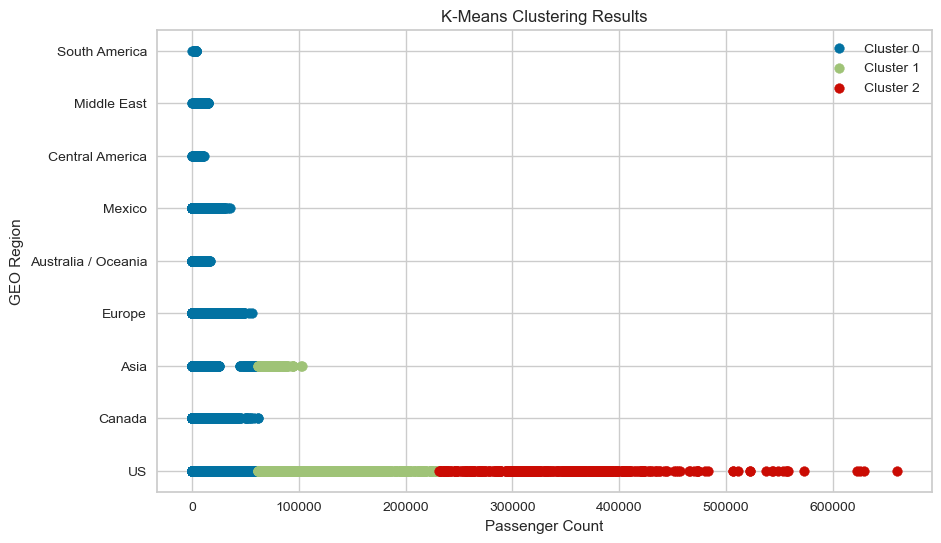

In [58]:
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Passenger Count'], cluster_data['GEO Region'], label=f'Cluster {cluster}')
plt.xlabel('Passenger Count')
plt.ylabel('GEO Region')
plt.title('K-Means Clustering Results')
plt.legend()
plt.show()